We are going to be demonstrating the central limit theorem, both with randomly generated data and with real world data.

## Central Limit Theorem

Let $X_1,...,X_n$ be idd with mean $\mu$ and variance $\sigma^2$.  Let $\overline{X}_n = \frac{1}{n} \sum_{i=1}^n {X_i}$.  Then

$$ Z_n = \frac{\overline{X}_n - \mu}{\sqrt{\text{V}(\overline{X}_n)}} = \frac{\sqrt{n}(\overline{X}_n - \mu)}{\sigma} \rightarrow Z \sim N(0,1)$$



In [1]:
%pylab inline
import pandas as pd
import numpy as np
from numpy.random import standard_cauchy

Populating the interactive namespace from numpy and matplotlib


In [19]:
n = 100
sample_size = 1000
_size = [sample_size, n]

distributions = {
    "UNIFORM": uniform(2, 7, size=_size),
    "BINOMIAL": binomial(10, 0.4, size=_size),
    "EXPONENTIAL": exponential(10, size=_size),
    "GAMMA": gamma(3, 1, size=_size),
    "BETA": beta(4, 8, size=_size),
    "CAUCHY": standard_cauchy(size=_size)
}

# Cleaner way to define a single set of samples.  The dictionary above is for graphing later.
# samples = uniform(2, 7, size=_size)
# samples = binomial(10, 0.4, size=_size)
# samples = exponential(10, size=_size)
# samples = gamma(3, 1, size=_size)
# samples = beta(4, 8, size=_size)
# samples = standard_cauchy(size=_size)

samples = distributions["UNIFORM"]

sample_mu = mean(samples)
sample_s2 = var(samples)

x_bars = samples.sum(axis=1)/float(n)
mu = mean(x_bars)
s2 = var(x_bars)

print "\nThe underlying distribution samples have mean: %f and variance: %f" % (sample_mu, sample_s2)
print "The x bar statistic with n=%d has mean: %f and variance: %f\n" % (n, mu, s2)
print "Variance of x bar: %f, Var(X)/n: %f\n" % (s2, sample_s2/n)


The underlying distribution samples have mean: 4.502724 and variance: 2.076698
The x bar statistic with n=100 has mean: 4.502724 and variance: 0.019366

Variance of x bar: 0.019366, Var(X)/n: 0.020767



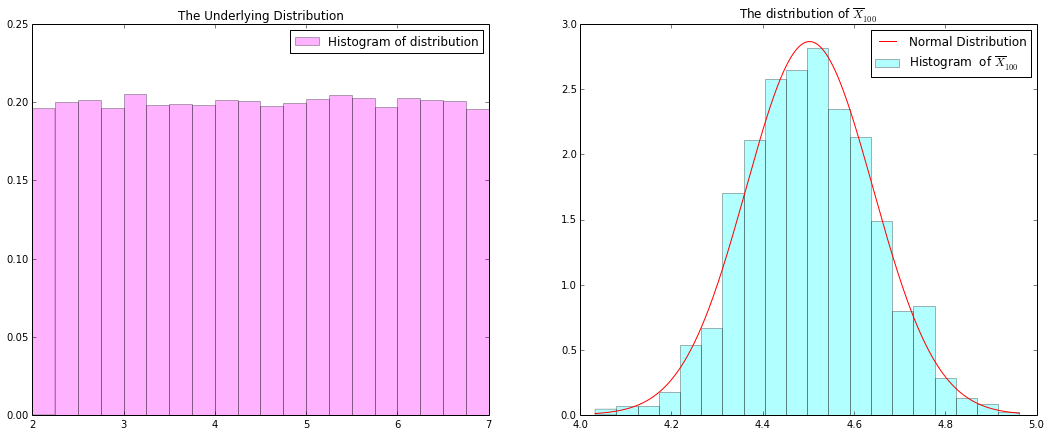

In [20]:
figsize(18, 7)
subplot(121)
_flattened = samples.flatten()
_ = hist(_flattened, normed=True, bins=20, alpha=0.3, color='magenta', label="Histogram of distribution")
title("The Underlying Distribution")
legend()

subplot(122)
_ = hist(x_bars, normed=True, bins=20, alpha=0.3, color='cyan', label=r"Histogram  of $\overline{X}_{%d}$" % n)

X = linspace(min(x_bars), max(x_bars), 1000)
Y = 1.0 / sqrt(2*pi*s2) * e**(-(X-mu)**2 / (2*s2))
plot(X, Y, 'r-', label="Normal Distribution")
title(r"The distribution of $\overline{X}_{%d}$" % n)
legend()

####If we want to graph a bunch at once we can loop through them.  Even better is to abstract the general parts and write a function

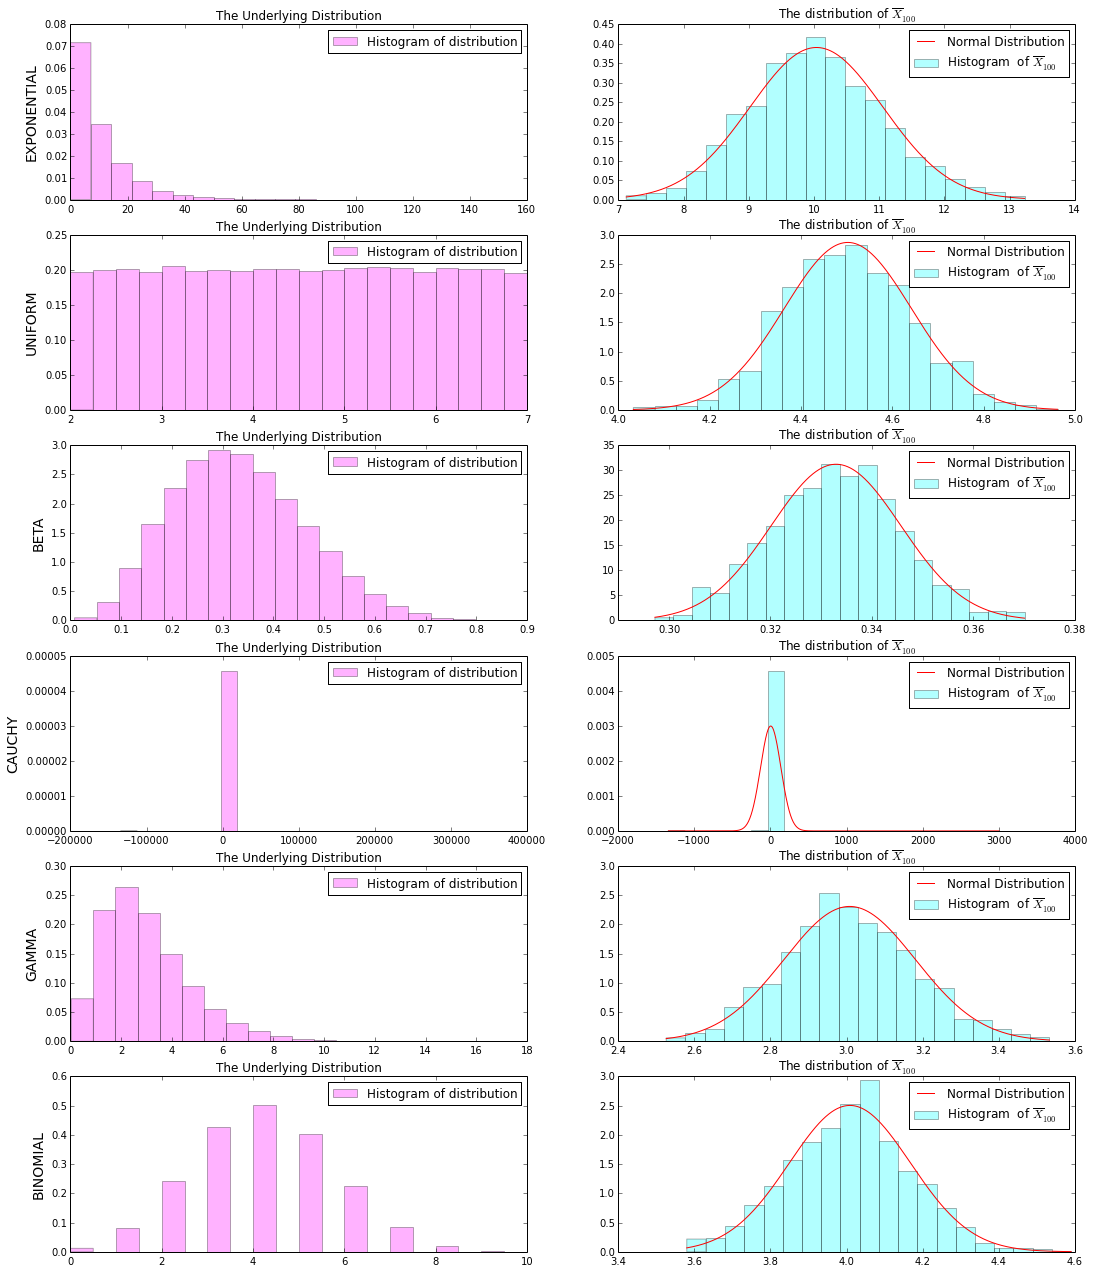

In [21]:
figsize(18, 22)
num_charts = len(distributions)
i = 0

for k in distributions:

    samples = distributions[k]
    x_bars = samples.sum(axis=1)/float(n)
    mu = mean(x_bars)
    s2 = var(x_bars)
    
    subplot(num_charts, 2, (2*i+1))
    _flattened = samples.flatten()
    _ = hist(_flattened, normed=True, bins=20, alpha=0.3, color='magenta', label="Histogram of distribution")
    title("The Underlying Distribution")
    legend()
    ylabel(k, size=14)
    ticklabel_format(style='plain')

    subplot(num_charts, 2, (2*i+2))
    _ = hist(x_bars, normed=True, bins=20, alpha=0.3, color='cyan', label=r"Histogram  of $\overline{X}_{%d}$" % n)

    X = linspace(min(x_bars), max(x_bars), 1000)
    Y = 1.0 / sqrt(2*pi*s2) * e**(-(X-mu)**2 / (2*s2))
    plot(X, Y, 'r-', label="Normal Distribution")
    title(r"The distribution of $\overline{X}_{%d}$" % n)
    legend()
    
    i +=1
    

##Uh Oh...
One of these things is not like the others.  What happened?

Let's look a little closer at the cauchy distribution

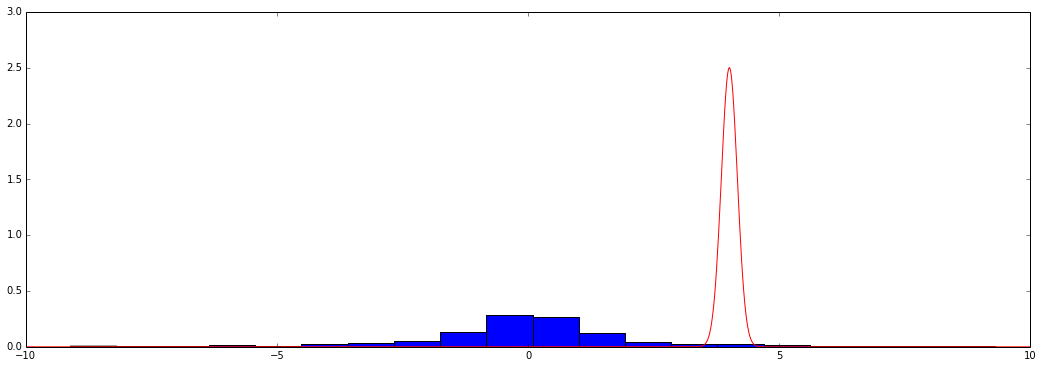

In [22]:
figsize(18, 6)
x_bars = distributions['CAUCHY'].sum(axis=1)/float(n)
bound = 10
window = [x for x in x_bars if -bound <= x <= bound]
_ = hist(window, normed=True, bins=20)

X = linspace(-bound, bound, 1000)
Y = 1.0 / sqrt(2*pi*s2) * e**(-(X-mu)**2 / (2*s2))
plot(X, Y, 'r-')

#Using Collected Data
Now let's load up our Citibike ridership data.

In [23]:
df = pd.read_csv('201412-citibike-tripdata.csv')
df.head(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1257,12/1/2014 00:00:28,12/1/2014 00:21:25,475,E 16 St & Irving Pl,40.735243,-73.987586,521,8 Ave & W 31 St,40.750450,-73.994811,16047,Customer,NaN,0
1,275,12/1/2014 00:00:43,12/1/2014 00:05:18,498,Broadway & W 32 St,40.748549,-73.988084,546,E 30 St & Park Ave S,40.744449,-73.983035,18472,Subscriber,1988,2


count    399069.000000
mean        745.757849
std        2712.153053
min          60.000000
0.5%         98.000000
50%         531.000000
99.5%      4302.660000
max      732149.000000
Name: tripduration, dtype: float64


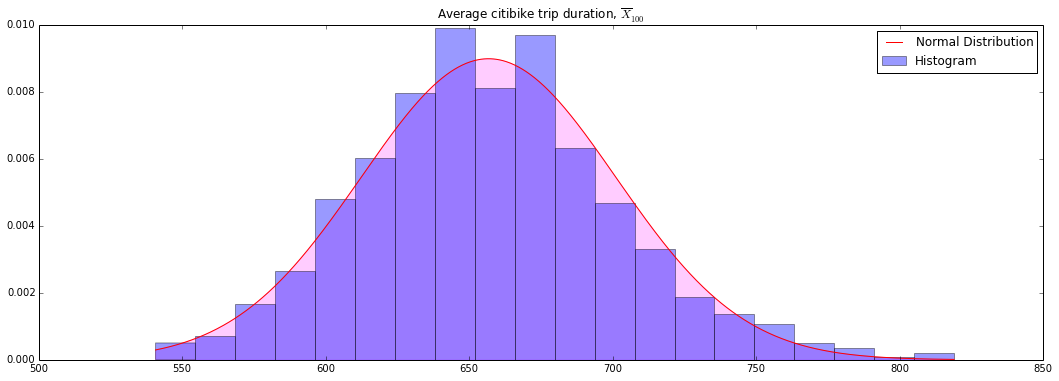

In [28]:
from random import sample

print df.tripduration.describe(percentile_width=99)

# The citibike data seems pretty dirty, so I am using domain knowledge
# to clean up the dataset.

df_clean = df[df.tripduration < 60*60*1]
# Why am I justified in doing this?  Am I justified?  Am I just doing
# arbitrary nonsense so my graphs will come out the way I want?

n = 100
sample_size = 1000

data = []
for i in range(sample_size):
    data.append(df_clean.loc[sample(df_clean.index, n)]['tripduration'].mean())
    
_ = hist(data, bins=20, normed=True, alpha=0.4, label="Histogram")

# Calculation
mu = mean(data)
s2 = var(data)
X = linspace(min(data), max(data), 1000)
Y = 1.0 / sqrt(2*pi*s2) * e**(-(X-mu)**2 / (2*s2))

# Graphing
plot(X, Y, 'r-', label="Normal Distribution")
fill_between(X, Y, alpha=0.2, color='magenta', label="Normal Distribution")
title(r"Average citibike trip duration, $\overline{X}_{%d}$" % n)
legend()


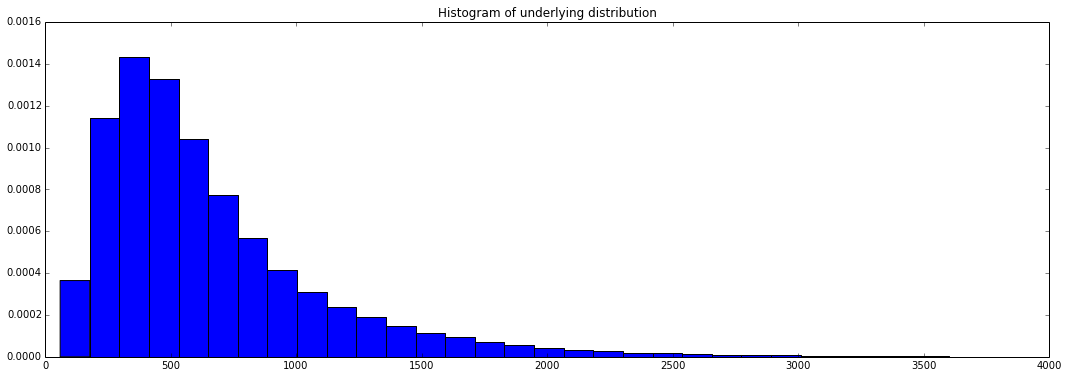

In [29]:
_ = hist(df_clean.tripduration, bins=30, normed=True)
title("Histogram of underlying distribution")